In [1]:
import os
os.chdir(r'C:\Users\metro\MachineLearning\Notebooks\Data')
os.getcwd()

'C:\\Users\\metro\\MachineLearning\\Notebooks\\Data'

In [2]:
import pandas as pd
dataset = pd.read_table('sms_spam_ham_Question5.TSV',sep='\t',header=None)
dataset.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dataset

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.columns = ['spam', 'Email']

In [5]:
dataset

,spam,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#importing all the nlp packages
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

tokenizer = WhitespaceTokenizer()
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [8]:
dataset.spam.value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [9]:
#map the spam column to spam=1 or ham=0
dataset['spam'] = dataset['spam'].map({ 
                                     'ham':0, 
                                     'spam':1
                                   })

In [10]:
dataset

,spam,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
corpus = []
for i in range(len(dataset.Email)):
    text = dataset.Email[i].lower()
    text = re.sub('[^a-z0-9]', ' ', text)
    tokens = tokenizer.tokenize(text)
    filtered_tokens = [w for w in tokens if w not in stop_words]
    filtered  = [stemmer.stem(lemmatizer.lemmatize(w)) for w in filtered_tokens]
    filtered_text = ' '.join(filtered)
    corpus.append(filtered_text)

In [21]:
corpus[:20]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think go usf life around though',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week free memb

In [14]:
#Bag of Words (BoW) technique to convert corpus into X
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(corpus)

CountVectorizer()

In [15]:
#each word as feature and column index 
cv.vocabulary_

{'go': 3052,
 'jurong': 3718,
 'point': 5019,
 'crazi': 2050,
 'avail': 1226,
 'bugi': 1607,
 'great': 3128,
 'world': 7079,
 'la': 3827,
 'buffet': 1605,
 'cine': 1840,
 'got': 3090,
 'amor': 1039,
 'wat': 6903,
 'ok': 4677,
 'lar': 3858,
 'joke': 3686,
 'wif': 7002,
 'oni': 4702,
 'free': 2885,
 'entri': 2554,
 'wkli': 7046,
 'comp': 1937,
 'win': 7013,
 'fa': 2673,
 'cup': 2100,
 'final': 2769,
 'tkt': 6464,
 '21st': 411,
 'may': 4188,
 '2005': 402,
 'text': 6349,
 '87121': 789,
 'receiv': 5321,
 'question': 5238,
 'std': 6050,
 'txt': 6625,
 'rate': 5282,
 'appli': 1111,
 '08452810075over18': 77,
 'dun': 2433,
 'say': 5571,
 'earli': 2449,
 'hor': 3364,
 'alreadi': 1012,
 'nah': 4440,
 'think': 6399,
 'usf': 6747,
 'life': 3928,
 'around': 1149,
 'though': 6414,
 'freemsg': 2892,
 'hey': 3294,
 'darl': 2148,
 'week': 6938,
 'word': 7073,
 'back': 1267,
 'like': 3938,
 'fun': 2938,
 'still': 6071,
 'tb': 6296,
 'xxx': 7137,
 'chg': 1798,
 'send': 5641,
 '50': 612,
 'rcv': 5293,
 'ev

In [16]:
features = list(cv.vocabulary_.keys())
features = sorted(features)

In [17]:
features

['00',
 '000',
 '000pe',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '0845

In [18]:
#Transform text to matrix for further modelling
X = pd.DataFrame(cv.transform(corpus).toarray(),columns=features)
y = dataset.spam

In [19]:
X.iloc[0,3052] #word go in the email  

1

In [20]:
X.iloc[0,2885]#word free in the email

0

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(),X,y,cv=4).mean()

0.9761306532663317

In [28]:
scores = []
for i in range(90,120,10):
                    model = RandomForestClassifier(n_estimators=i,random_state=42)
                    kfold_score = cross_val_score(model, X, y, cv = 4).mean()
                    scores.append(kfold_score) 

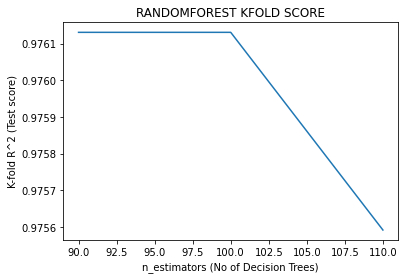

[0.9761306532663316, 0.9761306532663316, 0.9755922469490309]


In [29]:
import matplotlib.pyplot as plt
plt.plot(range(90,120,10),scores)
plt.xlabel('n_estimators (No of Decision Trees)')
plt.ylabel('K-fold R^2 (Test score)')
plt.title('RANDOMFOREST KFOLD SCORE')
plt.show()
print(scores)

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9784637473079684

In [49]:
from sklearn.model_selection import GridSearchCV

params = {
            'n_estimators': [120,130,140],
            'max_depth': [8,9,10]
        }
RDmodel = GridSearchCV(RandomForestClassifier(random_state=42), params,cv=5)
RDmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 9, 10],
                         'n_estimators': [120, 130, 140]})

In [51]:
print(RDmodel.best_params_)
print(RDmodel.best_score_) 

{'max_depth': 10, 'n_estimators': 130}
0.8961487551213363


In [52]:
Randomforest =RDmodel.best_estimator_
#print(Randomforest.fit(X_train_pca,y_train))
print(Randomforest.score(X_train,y_train)) #TRAIN SCORE
print(Randomforest.score(X_test,y_test)) #TEST SCORE
RDtrain=Randomforest.score(X_train,y_train)

0.9078726968174204
0.8966259870782484


In [58]:
Email = ['free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18 ','ok enjoy']

In [59]:
RDmodel.fit(X,y)
RDmodel.predict(cv.transform(Email).toarray())

array([0, 0], dtype=int64)